In [1]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D


In [2]:
def f(x):
    return np.sin(x)

__*1.*__

In [3]:
x = np.linspace(0, 10)
y = f(x)

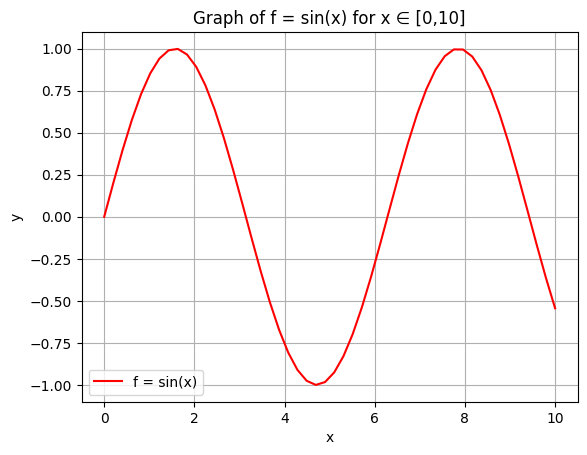

In [4]:
plt.plot(x, y, label="f = sin(x)", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph of f = sin(x) for x ∈ [0,10]")
plt.legend()
plt.grid(True)
plt.show()

__*2.*__

The kth derivative of f for any k >= 0 is :

$k = 0$ : $f(x) = \sin(x)$ 

$k = 1$ : $f'(x) = \cos(x)$ 

$k = 2$ : $f''(x) = -\sin(x)$ 

$k = 3$ : $f'''(x) = -\cos(x)$ 

$k = 4$ : $f^{(4)}(x) = \sin(x)$

Now that we found the pattern we can see that every 4 times the cycle of derivatives restarts so we know is the kth order of derivative


\begin{cases}
\sin(x) & \text{if } k \equiv 0 \% 4 \\
\cos(x) & \text{if } k \equiv 1 \% 4 \\
-\sin(x) & \text{if } k \equiv 2 \% 4 \\
-\cos(x) & \text{if } k \equiv 3 \% 4
\end{cases}



In [5]:
def find_derivative(k,x):
    if k%4 == 0 :
        return f(x)
    elif k%4 == 1:
        return np.cos(x)
    elif k%4 == 2:
        return f(x)*(-1)
    else :
        return np.cos(x)*(-1)


__*3.*__

Recall that the tangent line is the first-order Taylor
approximation.

$$
t_1(x; \bar{x}) = f(\bar{x}) + f'(\bar{x})(x - \bar{x})
$$


In [6]:
def find_tangent(xBar,x):
    return f(xBar) + find_derivative(1,xBar)*(x-xBar)

In [7]:
xBar = 0
tangent = find_tangent(xBar,x)
print(f"the tangent is {tangent}")

the tangent is [ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]


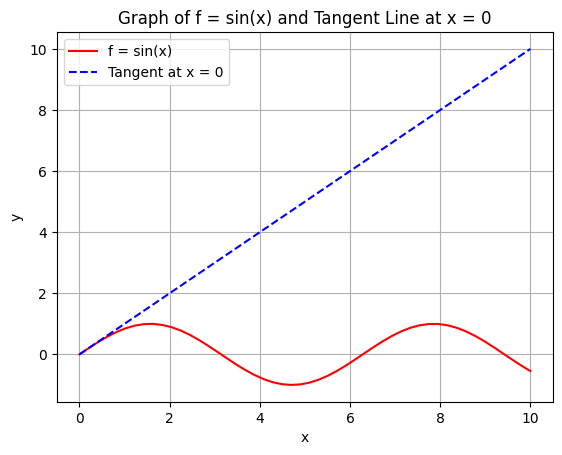

In [8]:
plt.plot(x, y, label="f = sin(x)", color="red")
plt.plot(x, tangent, label=f"Tangent at x = 0", color="blue", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graph of f = sin(x) and Tangent Line at x = 0")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
def find_taylor_approximation(k,xBar,x):
    first = find_tangent(xBar,x) 
    sum = first
    for i in range(2,k):
        sum +=((1/math.factorial(i))*find_derivative(i,xBar)*((x-xBar)**i))
    return sum


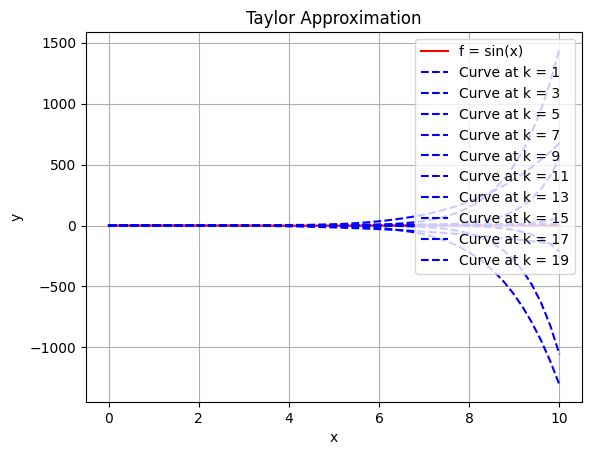

In [10]:
k = 19
plt.plot(x, y, label="f = sin(x)", color="red")
for i in range(1,k+1,2):
    plt.plot(x, find_taylor_approximation(i,xBar,x), label=f"Curve at k = {i}", color="blue", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Taylor Approximation")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
x_New = 2
k = 19
err_arr=[]
k_values=[]
for i in range(1,k+1,2):
    app_err = np.abs(f(x_New)-find_taylor_approximation(i,xBar,x_New))
    err_arr.append(app_err)
    k_values.append(i)

df = pd.DataFrame({"k": k_values, "Approximation Error": err_arr})

print(df)

    k  Approximation Error
0   1         1.090703e+00
1   3         1.090703e+00
2   5         2.426308e-01
3   7         2.403591e-02
4   9         1.360919e-03
5  11         5.001586e-05
6  13         1.290863e-06
7  15         2.469399e-08
8  17         3.642341e-10
9  19         4.269252e-12


__*Gradient Descent*__

__*1.*__

In [12]:
def bivariate_f(x):
    x1 = x[0]
    x2 = x[1] 
    return 100*(x2-(x1**2))**2 + (x1 -1)**2

__*2.*__

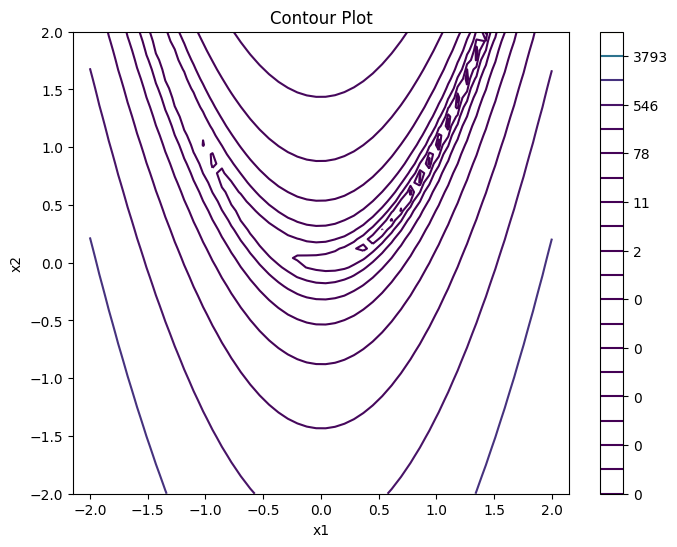

In [13]:
x1 = np.linspace(-2, 2)  
x2 = np.linspace(-2, 2)  
X1, X2 = np.meshgrid(x1, x2) 
arg = [X1,X2]
cont = bivariate_f(arg)

plt.figure(figsize=(8, 6))
contour = plt.contour(X1, X2, cont, levels=np.logspace(-4,4,20), cmap='viridis')
plt.colorbar(contour)  
plt.title('Contour Plot')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis("equal") 
plt.show()


__*ZOOM in and determine min and optimal variables*__

we find out the min to be (1,1) which means that the optimal variables are :

- x1=1
- x2=1 

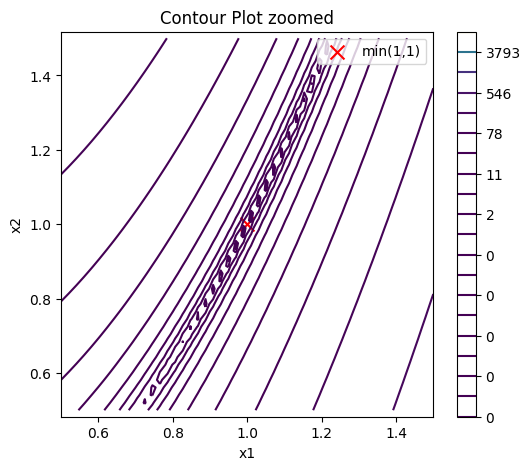

In [14]:
x1_zoom = np.linspace(0.5, 1.5)
x2_zoom = np.linspace(0.5, 1.5)
X1_zoom, X2_zoom = np.meshgrid(x1_zoom, x2_zoom)
cont_zoom = bivariate_f([X1_zoom, X2_zoom])

plt.figure(figsize=(6, 5))
contour_zoom = plt.contour(X1_zoom, X2_zoom, cont_zoom, levels=np.logspace(-4,4, 20), cmap='viridis')
plt.colorbar(contour_zoom)
plt.scatter(1, 1, color="red", marker="x", s=100, label="min(1,1)")
plt.legend()
plt.title("Contour Plot zoomed")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal") 
plt.show()

__*3.*__

/tmp/ipykernel_60320/646679570.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xticklabels=['X1'],


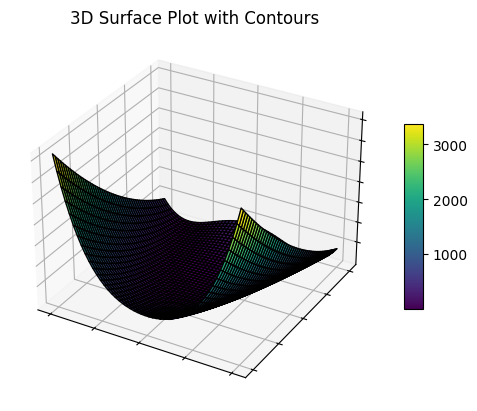

In [15]:
x1 = np.linspace(-2, 2)  
x2 = np.linspace(-2, 2)  
X1, X2 = np.meshgrid(x1, x2) 
arg = [X1,X2]
Z = bivariate_f(arg)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, cont, cmap='viridis', edgecolor='k')
ax.contour3D(X1, X2, Z)
ax.set(xticklabels=['X1'],
       yticklabels=['X2'],
       zticklabels=['Contour'])
ax.set_title('3D Surface Plot with Contours')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

__*4.*__

In [16]:
def grad_f(x):
    x1, x2 = x
    grad_x1 = -400 * x1 * (x2 - x1**2) - 2 * (x1 - 1)
    grad_x2 = 200 * (x2 - x1**2)
    return np.array([grad_x1, grad_x2])

__*5*__

In [17]:
def gradient_descent(f,grad,alpha,x_start,max_iter=1000,eps=1e-6):
    x = x_start
    trj = [x]
    for i in range(max_iter):
        gradient = grad(x)
        if np.linalg.norm(gradient) < eps:
            break
        x = x - alpha * gradient
        trj.append(x)
        
        print(f"Iteration {i+1}: x = {x}, f(x) = {f(x)}")
    
    print(f"Final iterate: x = {x}, f(x) = {f(x)}")
    
    trj = np.array(trj)
    plt.plot(trj[:, 0], trj[:, 1], 'bo-', label='Trajectory')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Gradient Descent Trajectory")
    plt.legend()
    plt.show()
    
    return trj


__*6.*__

Iteration 1: x = [0.849 1.65 ], f(x) = 86.36387916010001
Iteration 2: x = [1.16425398 1.4641602 ], f(x) = 1.2079586184144206
Iteration 3: x = [1.21519162 1.44242563], f(x) = 0.1637167197002658
Iteration 4: x = [1.19896656 1.44927863], f(x) = 0.05341230526225949
Iteration 5: x = [1.20500339 1.44692707], f(x) = 0.044633603904243056
Iteration 6: x = [1.20295225 1.44794829], f(x) = 0.041262577090495564
Iteration 7: x = [1.20376917 1.44777746], f(x) = 0.04168641818653545
Iteration 8: x = [1.20355905 1.44803401], f(x) = 0.0414633668353565
Iteration 9: x = [1.20371564 1.44813808], f(x) = 0.04156299143093764
Iteration 10: x = [1.20374113 1.44829674], f(x) = 0.04155888344299273
Iteration 11: x = [1.2038135  1.44843593], f(x) = 0.04159338449215792
Iteration 12: x = [1.20386912 1.44858213], f(x) = 0.041614277951101675
Iteration 13: x = [1.20393076 1.44872588], f(x) = 0.04164008296024685
Iteration 14: x = [1.20399026 1.44887056], f(x) = 0.04166414933974506
Iteration 15: x = [1.20405053 1.44901495]

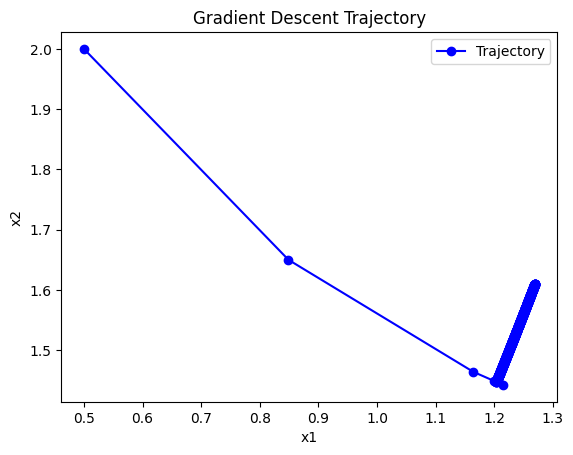

array([[0.5       , 2.        ],
       [0.849     , 1.65      ],
       [1.16425398, 1.4641602 ],
       ...,
       [1.26918288, 1.60990734],
       [1.26925528, 1.61009091],
       [1.26932769, 1.61027452]])

In [18]:
gradient_descent(bivariate_f,grad_f,0.001,np.array([0.5, 2]))

__*Considrations*__

It seems like the step size is a bit to big for the functionbe because when it oscillates a lot close to the minimun and it is not able to properly get close enough to it. I would be better to slowly update the learning rate as soon as we reach the minimum so that it does not start to oscillate and not reach the sweet spot.